In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import pydub
from pydub import AudioSegment
from pydub.utils import mediainfo
from scipy import signal
import array
import glob
import os
from pathlib import Path

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\singh\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
noisy_s = noisy_speech.get_array_of_samples() # samples x(t)
noisy_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

Text(0, 0.5, 'Amplitude')

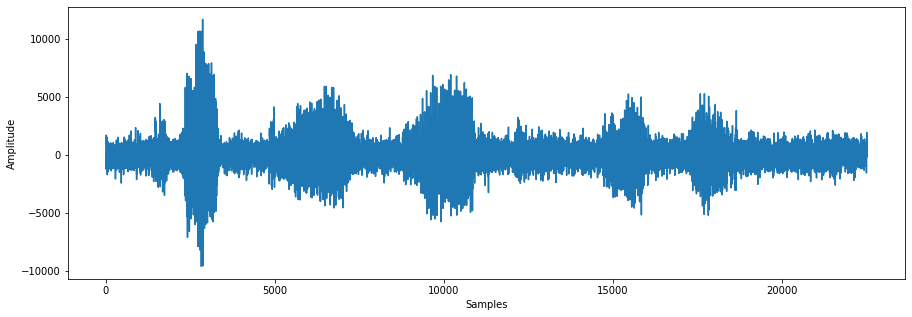

In [3]:
plt.figure(figsize = (15, 5))
plt.plot(noisy_s)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

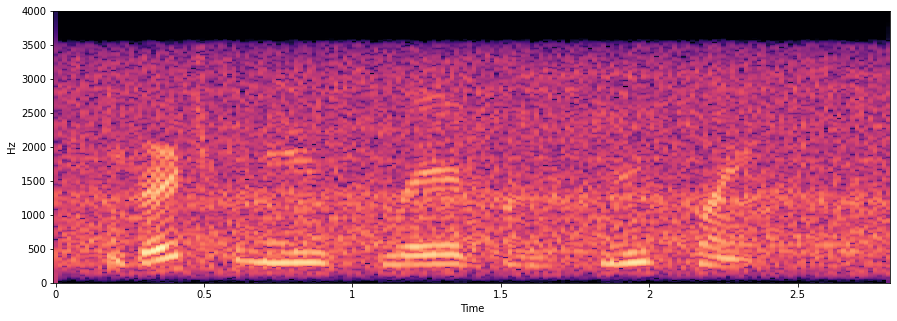

In [4]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 2048
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(noisy_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
noisy_S = librosa.stft(np.float32(noisy_s),
                       n_fft = freq_range,
                       window = window,
                       hop_length = hop_length,
                       win_length = win_length)
plt.figure(figsize = (15, 5))

#convert the amplitude to decibels, just for illustration purpose
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S))
librosa.display.specshow(
    #spectrogram
    noisy_Sdb,
    #sampling rate
    sr = noisy_f,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_lenght
    hop_length = hop_length)

In [5]:
#order
order = 10
#sampling frequency
sampling_freq = noisy_f
#cut-off frequency. This can be an array if band-pass filter is used
#this must be within 0 and cutoff_freq/2
cutoff_freq = 1000
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
filter_type = 'lowpass'
#filter
h = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

In [6]:
filtered_s = signal.sosfilt(h, noisy_s)

In [7]:
filtered_s_audio = pydub.AudioSegment(
    data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
    #2 bytes = 16 bit samples
    sample_width = 2,
    #frame rate
    frame_rate = noisy_f,
    #channels = 1 for mono and 2 for stereo
    channels = 1)
filtered_s_audio.export('sp01_station_sn5_lowpass.wav', format = 'wav')

C:\Users\singh\AppData\Local\Temp\ipykernel_7544\2276778144.py:2: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array(noisy_speech.array_type, np.float16(filtered_s)),


<_io.BufferedRandom name='sp01_station_sn5_lowpass.wav'>

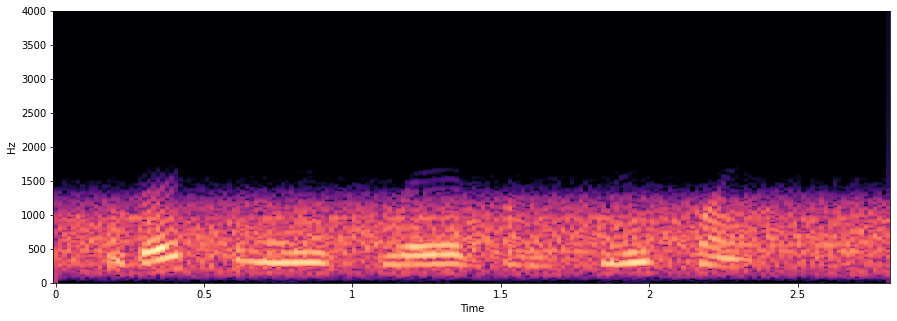

In [8]:
freq_range = 2048
win_length = int(noisy_f * 0.03)
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

X = librosa.stft(np.float32(filtered_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(
    #spectrogram
    Xdb,
    #sampling rate
    sr = noisy_f,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_length
    hop_length = hop_length)


C:\Users\singh\AppData\Local\Temp\ipykernel_7544\4263494468.py:14: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array(noisy_speech.array_type, np.float16(filtered_s)),


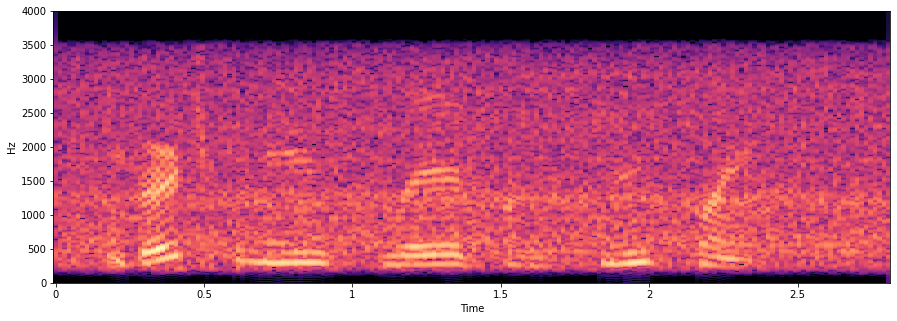

In [21]:
#Task 1.1: highpass_filter
cutoff_freq = 200
filter_type = 'highpass'

h_highpass = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

filtered_s = signal.sosfilt(h_highpass, noisy_s)
filtered_s_audio = pydub.AudioSegment(
    data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
    #2 bytes = 16 bit samples
    sample_width = 2,
    #frame rate
    frame_rate = noisy_f,
    #channels = 1 for mono and 2 for stereo
    channels = 1)
filtered_s_audio.export('sp01_station_sn5_highpass.wav', format = 'wav')

freq_range = 2048
win_length = int(noisy_f * 0.03)
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

X = librosa.stft(np.float32(filtered_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(
    #spectrogram
    Xdb,
    #sampling rate
    sr = noisy_f,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_length
    hop_length = hop_length)

C:\Users\singh\AppData\Local\Temp\ipykernel_7544\2582731388.py:14: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array(noisy_speech.array_type, np.float16(filtered_s)),


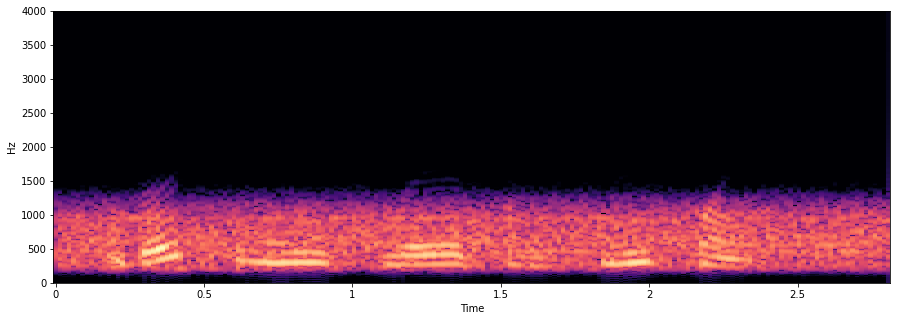

In [10]:
#Task 1.2: bandpass filter
cutoff_freq = [200,1000]
filter_type = 'bandpass'

h_bandpass = signal.butter(N = order,
                  fs = sampling_freq,
                  Wn = cutoff_freq,
                  btype = filter_type,
                  analog = False,
                  output = 'sos')

filtered_s = signal.sosfilt(h_bandpass, noisy_s)
filtered_s_audio = pydub.AudioSegment(
    data = array.array(noisy_speech.array_type, np.float16(filtered_s)),
    #2 bytes = 16 bit samples
    sample_width = 2,
    #frame rate
    frame_rate = noisy_f,
    #channels = 1 for mono and 2 for stereo
    channels = 1)
filtered_s_audio.export('sp01_station_sn5_bandpass.wav', format = 'wav')

freq_range = 2048
win_length = int(noisy_f * 0.03)
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'

X = librosa.stft(np.float32(filtered_s), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(
    #spectrogram
    Xdb,
    #sampling rate
    sr = noisy_f,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_length
    hop_length = hop_length)

#### Noise Attenuation

In [11]:
# Read audio data from file
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')
y = noisy_speech.get_array_of_samples() # samples x(t)
y_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(y_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4

hop_length = int(win_length / 2)
Y = librosa.stft(np.float32(y),
    n_fft = 2048,
    window = 'hann',
    hop_length = hop_length,
    win_length = win_length)
mag_Y = abs(Y)



In [12]:
# Read audio data from file
noise = AudioSegment.from_wav('Noise/Station/Station_1.wav')
d = noise.get_array_of_samples()
d_f = noise.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(d_f * 0.03)
#number of samples between two consecutive frames
#by default, hop_length = win_length / 4

hop_length = int(win_length / 2)
D = librosa.stft(np.float32(d),
    n_fft = 2048,
    window = 'hann',
    hop_length = hop_length,
    win_length = win_length)
mag_D = abs(D)
square_mag_D = mag_D * mag_D #element wise multiplication

In [13]:
means_square_mag_D = np.mean(square_mag_D, axis = 1)

H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)

for k in range(H.shape[0]):
    for t in range(H.shape[1]):
        H[k][t] = np.sqrt(max(0,1-means_square_mag_D[k]/ (mag_Y[k][t] * mag_Y[k][t])))

S_hat = H * Y

In [14]:
win_length = int(y_f * 0.03)
hop_length = int(win_length / 2)
s_hat = librosa.istft(S_hat, win_length=win_length, hop_length=hop_length, length=len(y))

In [15]:
s_hat_truncated = np.float16(s_hat)
for i, num in enumerate(s_hat_truncated):
    if num > 32767:
        s_hat_truncated[i] = 32767
    elif num < -32768:
        s_hat_truncated[i] = -32768
        
data = array.array('h', s_hat_truncated)

s_hat_audio = AudioSegment(
    #raw data
    data = data,
    #2 bytes = 16 bit samples
    sample_width = 2,
    #frame rate
    frame_rate = y_f,
    #channels = 1 for mono and 2 for stereo
    channels = 1)
s_hat_audio.export('sp01_station_sn5_spectralsubtraction.wav', format = 'wav')

C:\Users\singh\AppData\Local\Temp\ipykernel_7544\2780321846.py:8: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array('h', s_hat_truncated)


<_io.BufferedRandom name='sp01_station_sn5_spectralsubtraction.wav'>

In [16]:
##Visualize spectrogram
def visualise_spectrogram(speech):
    x = speech.get_array_of_samples()
    x_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
    freq_range = 2048
    #window size: the number of samples per frame
    #each frame is of 30ms
    win_length = int(x_sr * 0.03)
    #number of samples between tww consecutive frames
    hop_length = int(win_length / 2)
    #windowing technique
    window = 'hann'
    
    X = librosa.stft(np.float32(x), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
    
    plt.figure(figsize = (15, 5))
    #convert the amplitude to decibels, just for illustration purpose
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(
        #spectrogram
        Xdb,
        #sampling rate
        sr = x_sr,
        #label for horizontal axis
        x_axis = 'time',
        #presentation scale
        y_axis = 'linear',
        #hop_length
        hop_length = hop_length)
    plt.show()

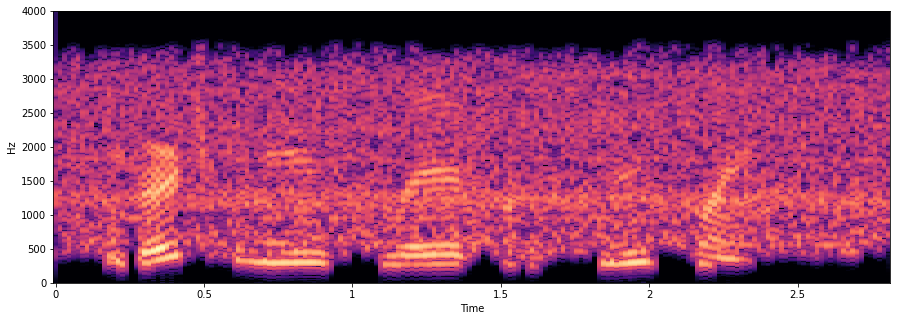

In [17]:
visualise_spectrogram(s_hat_audio)

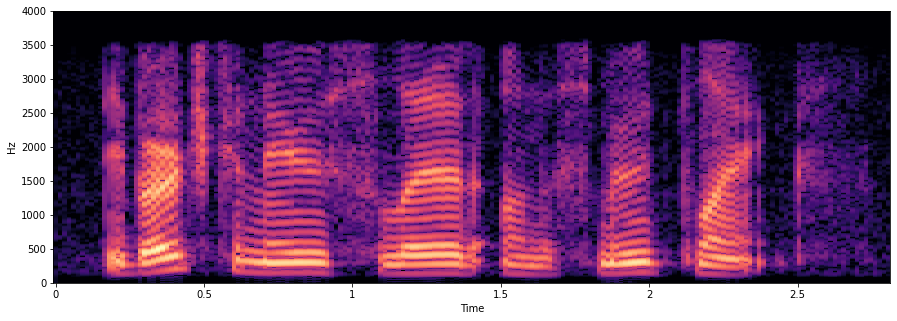

In [18]:
clean_signal = AudioSegment.from_wav('CleanSignal/sp01.wav') # Read audio data from file
visualise_spectrogram(clean_signal)

In [19]:
def do_spectral_subtraction(audio_file):
    noisy_speech = AudioSegment.from_wav(audio_file)
    y = noisy_speech.get_array_of_samples() # samples x(t)
    y_f = noisy_speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
    #window size: the number of samples per frame
    #each frame is of 30ms
    win_length = int(y_f * 0.03)
    #number of samples between two consecutive frames
    #by default, hop_length = win_length / 4
    
    hop_length = int(win_length / 2)
    Y = librosa.stft(np.float32(y),
        n_fft = 2048,
        window = 'hann',
        hop_length = hop_length,
        win_length = win_length)
    mag_Y = abs(Y)
    
    noise = None
    if ("Station" in file):
        noise = AudioSegment.from_wav('Noise/Station/Station_1.wav')
    elif ("Babble" in file):
        noise = AudioSegment.from_wav('Noise/Station/Station_1.wav')
    else:
        noise = None
    
    d = noise.get_array_of_samples()
    d_f = noise.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
    #window size: the number of samples per frame
    #each frame is of 30ms
    win_length = int(d_f * 0.03)
    #number of samples between two consecutive frames
    #by default, hop_length = win_length / 4
    
    hop_length = int(win_length / 2)
    D = librosa.stft(np.float32(d),
        n_fft = 2048,
        window = 'hann',
        hop_length = hop_length,
        win_length = win_length)
    mag_D = abs(D)
    square_mag_D = mag_D * mag_D #element wise multiplication
    means_square_mag_D = np.mean(square_mag_D, axis = 1)

    H = np.zeros((mag_Y.shape[0], mag_Y.shape[1]), np.float32)
    
    for k in range(H.shape[0]):
        for t in range(H.shape[1]):
            H[k][t] = np.sqrt(max(0,1-means_square_mag_D[k]/ (mag_Y[k][t] * mag_Y[k][t])))
    
    S_hat = H * Y
    
    win_length = int(y_f * 0.03)
    hop_length = int(win_length / 2)
    s_hat = librosa.istft(S_hat, win_length=win_length, hop_length=hop_length, length=len(y))
    
    s_hat_truncated = np.float16(s_hat)
    for i, num in enumerate(s_hat_truncated):
        if num > 32767:
            s_hat_truncated[i] = 32767
        elif num < -32768:
            s_hat_truncated[i] = -32768
            
    data = array.array('h', s_hat_truncated)
    
    s_hat_audio = AudioSegment(
        #raw data
        data = data,
        #2 bytes = 16 bit samples
        sample_width = 2,
        #frame rate
        frame_rate = y_f,
        #channels = 1 for mono and 2 for stereo
        channels = 1)
    base_file_name = Path(audio_file).stem
    s_hat_audio.export(base_file_name + '_spectralsubtraction.wav', format = 'wav')
    return s_hat_audio

Clean Spectrogram for file sp01


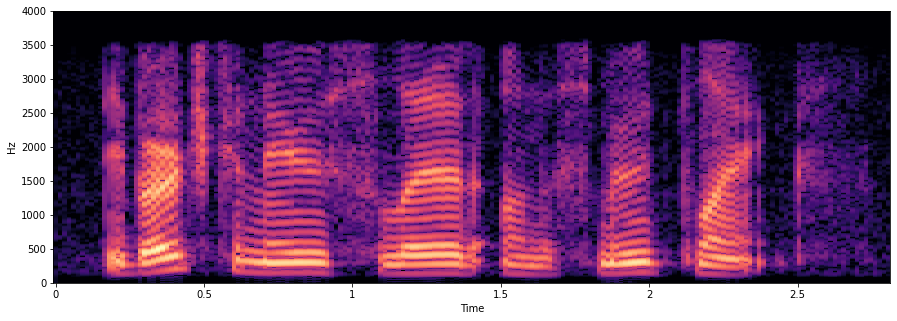

Subtracted Spectrogram for file NoisySignal\Babble\sp01_babble_sn5.wav


C:\Users\singh\AppData\Local\Temp\ipykernel_7544\913184134.py:64: DeprecationWarning: an integer is required (got type numpy.float16).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data = array.array('h', s_hat_truncated)


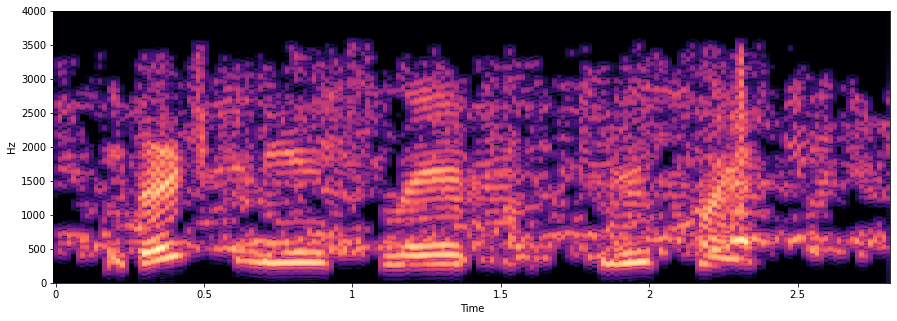

Clean Spectrogram for file sp02


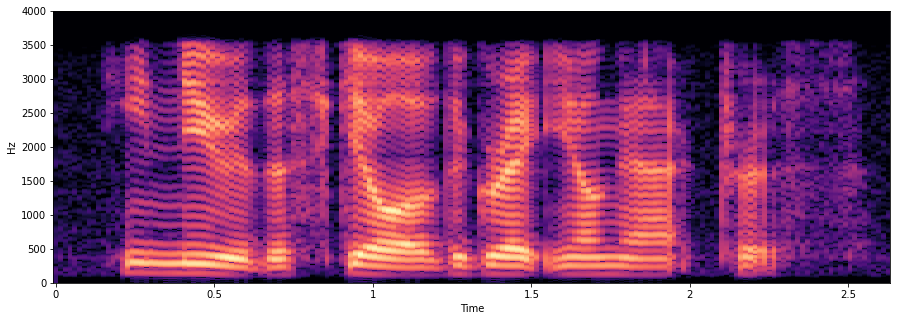

Subtracted Spectrogram for file NoisySignal\Babble\sp02_babble_sn5.wav


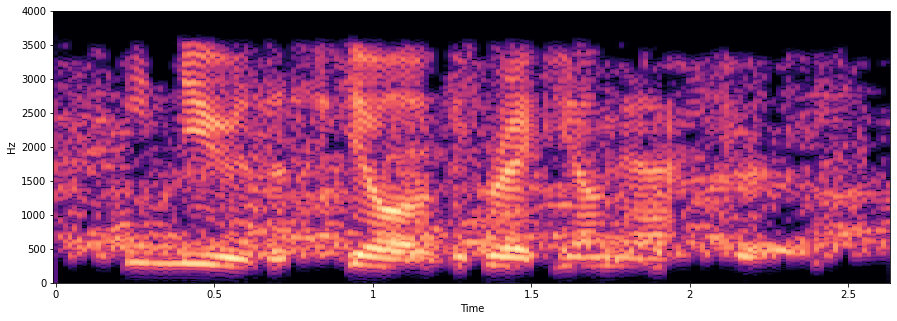

Clean Spectrogram for file sp03


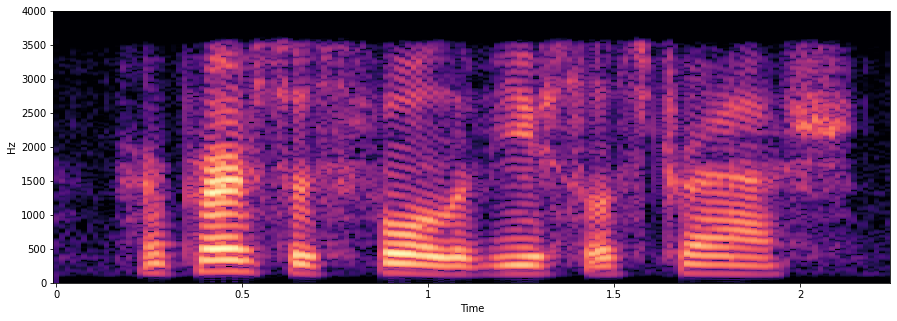

Subtracted Spectrogram for file NoisySignal\Babble\sp03_babble_sn5.wav


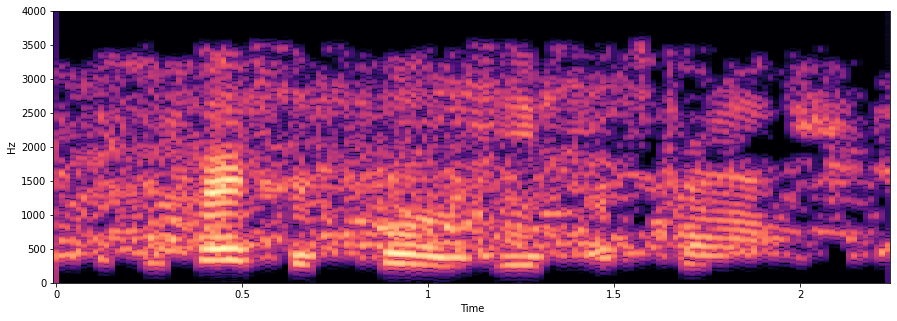

Clean Spectrogram for file sp04


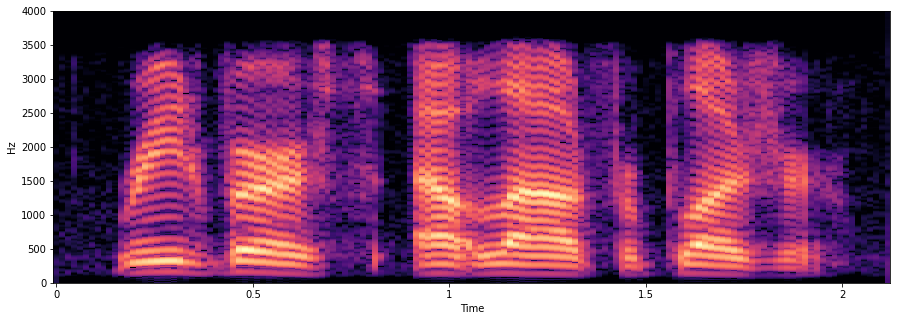

Subtracted Spectrogram for file NoisySignal\Babble\sp04_babble_sn5.wav


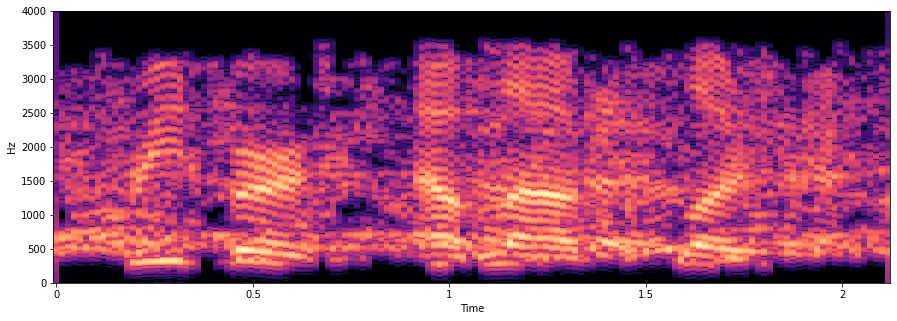

Clean Spectrogram for file sp05


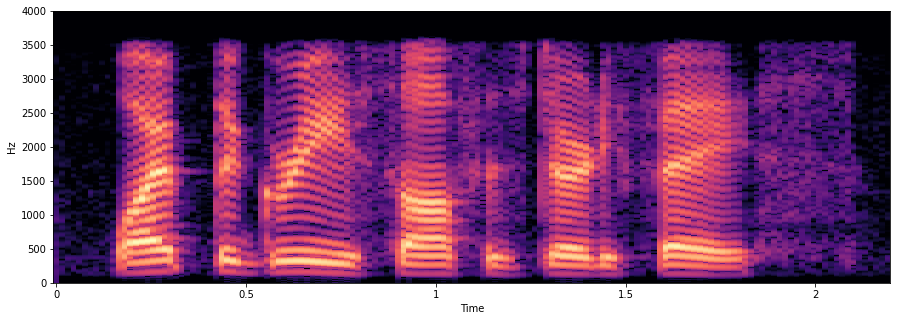

Subtracted Spectrogram for file NoisySignal\Babble\sp05_babble_sn5.wav


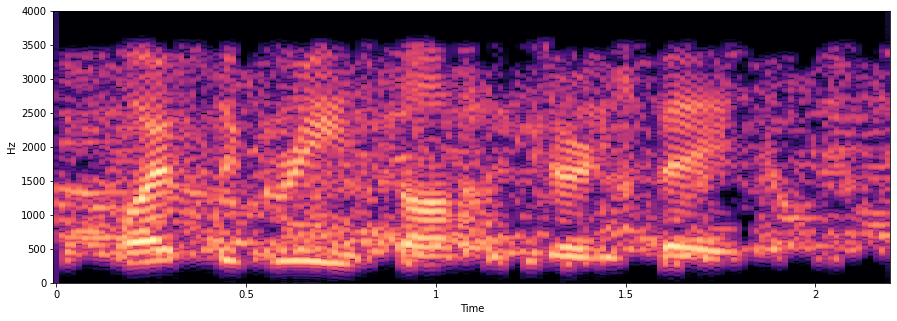

Clean Spectrogram for file sp01


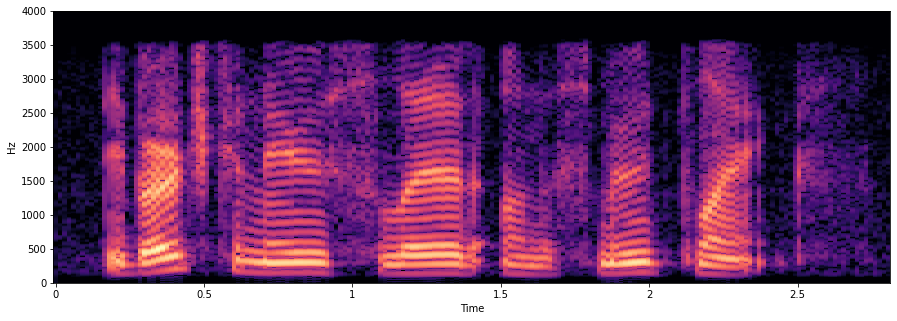

Subtracted Spectrogram for file NoisySignal\Station\sp01_station_sn5.wav


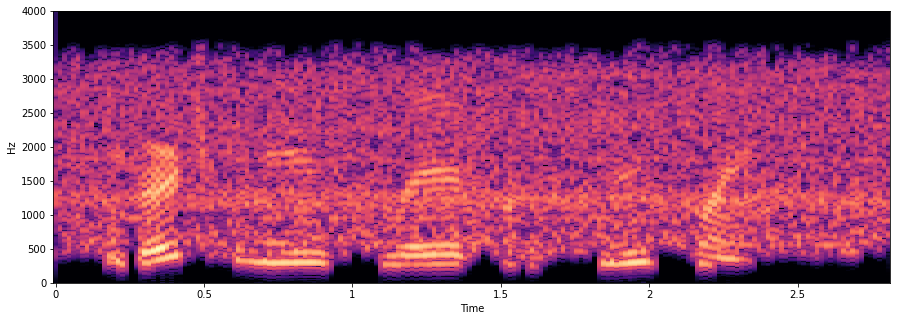

Clean Spectrogram for file sp02


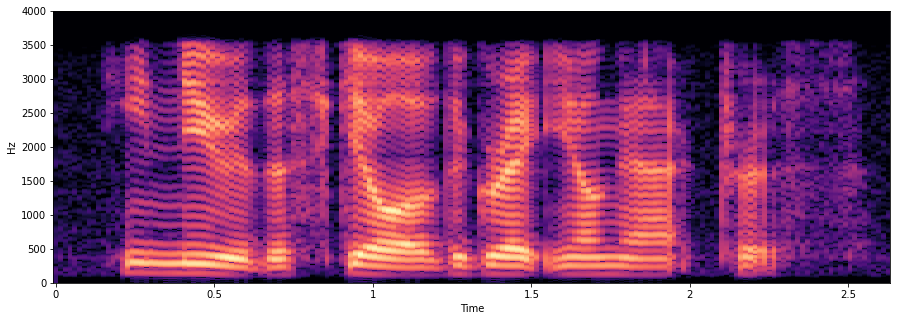

Subtracted Spectrogram for file NoisySignal\Station\sp02_station_sn5.wav


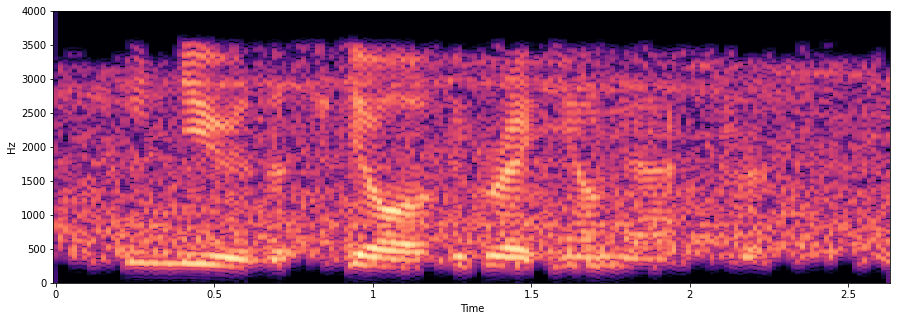

Clean Spectrogram for file sp03


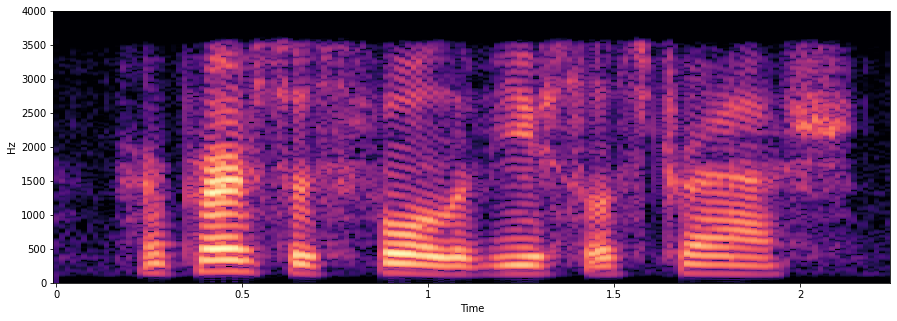

Subtracted Spectrogram for file NoisySignal\Station\sp03_station_sn5.wav


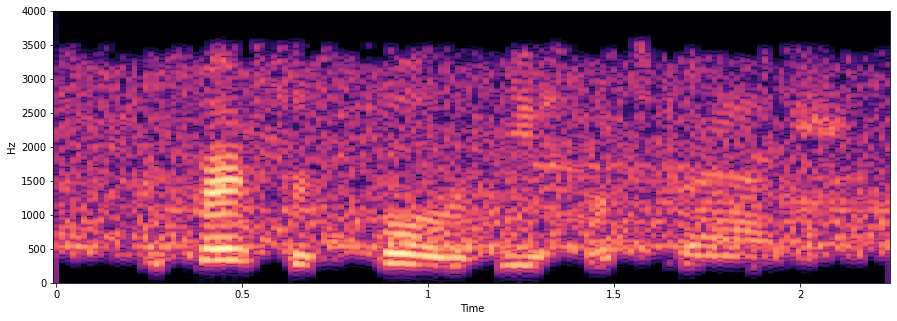

Clean Spectrogram for file sp04


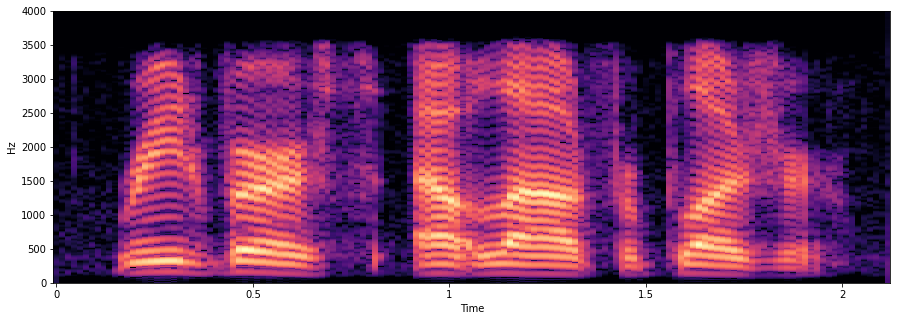

Subtracted Spectrogram for file NoisySignal\Station\sp04_station_sn5.wav


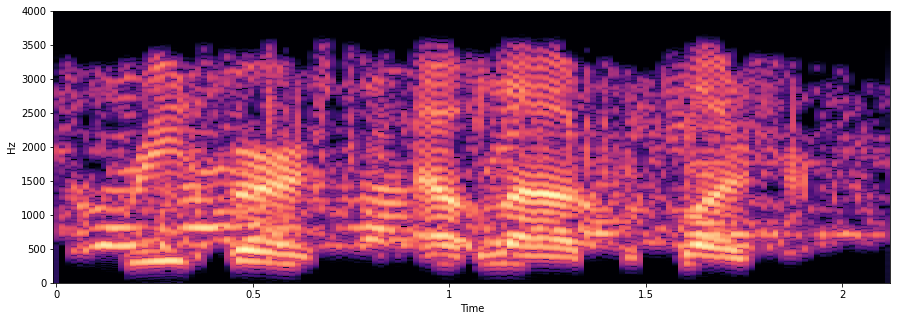

Clean Spectrogram for file sp05


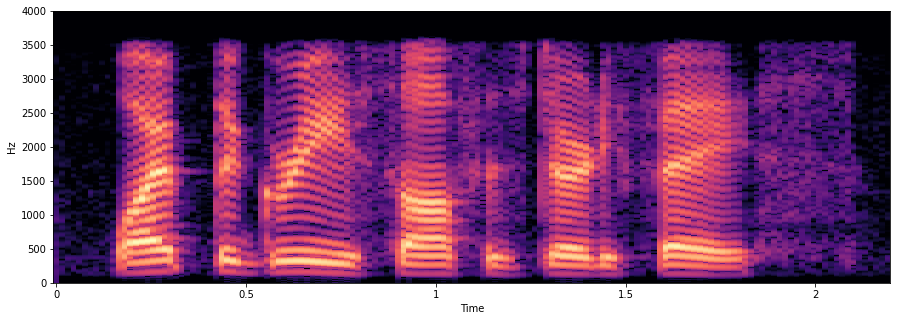

Subtracted Spectrogram for file NoisySignal\Station\sp05_station_sn5.wav


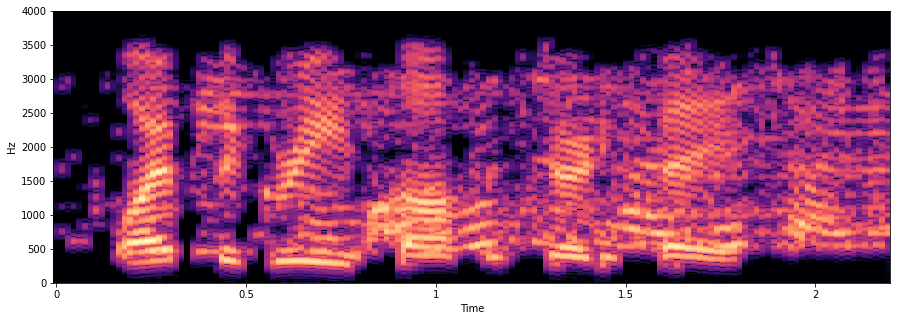

In [20]:
files = glob.glob("NoisySignal/*/*")

for file in files:
    base_name_clean_signal = Path(file).stem
    base_name_clean_signal = base_name_clean_signal[:base_name_clean_signal.find("_")]
    
    print ("Clean Spectrogram for file", base_name_clean_signal)
    clean_signal = AudioSegment.from_wav("CleanSignal/" +  base_name_clean_signal + ".wav")
    visualise_spectrogram(clean_signal)
    
    print ("Subtracted Spectrogram for file", file)
    spectral_subtracted_audio = do_spectral_subtraction(file)
    visualise_spectrogram(spectral_subtracted_audio)
